#Airfoil Self-Noise Data Set 

The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. 

The span of the airfoil and the observer position were the same in all of the experiments.

The NASA data set was obtained from a series of aerodynamic and acoustic tests of two and three-dimensional airfoil blade sections conducted in an anechoic wind tunnel.

Link: [Airfoil Self-Noise Data Set](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise#)

##Required packages

In [0]:
import warnings
import pandas as pd
import seaborn as sns
import numpy as np


#To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

#Machine learn packages
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, MultiTaskLasso, ElasticNet
from sklearn.svm import SVC





warnings.filterwarnings('ignore')

## Get the data

### Attribute Information:

1. Frequency, in Hertzs. 
2. Angle of attack, in degrees. 
3. Chord length, in meters. 
4. Free-stream velocity, in meters per second. 
5. Suction side displacement thickness, in meters. 

The only output is: 
6. Scaled sound pressure level, in decibels. 

In [0]:
url_file = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat'
columns = ['frequency','angle_of_attack', 'chord_length', 'free_stream_velocity','suction_side_displacement_thickness','target']

airfoil_dataset = pd.read_csv(url_file, sep='\t', header=None, names=columns)


In [3]:
airfoil_dataset.head()

,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_displacement_thickness,target
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [4]:
airfoil_dataset.describe()

,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_displacement_thickness,target
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [5]:
airfoil_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
frequency                              1503 non-null int64
angle_of_attack                        1503 non-null float64
chord_length                           1503 non-null float64
free_stream_velocity                   1503 non-null float64
suction_side_displacement_thickness    1503 non-null float64
target                                 1503 non-null float64
dtypes: float64(5), int64(1)
memory usage: 70.5 KB


## Explore the data



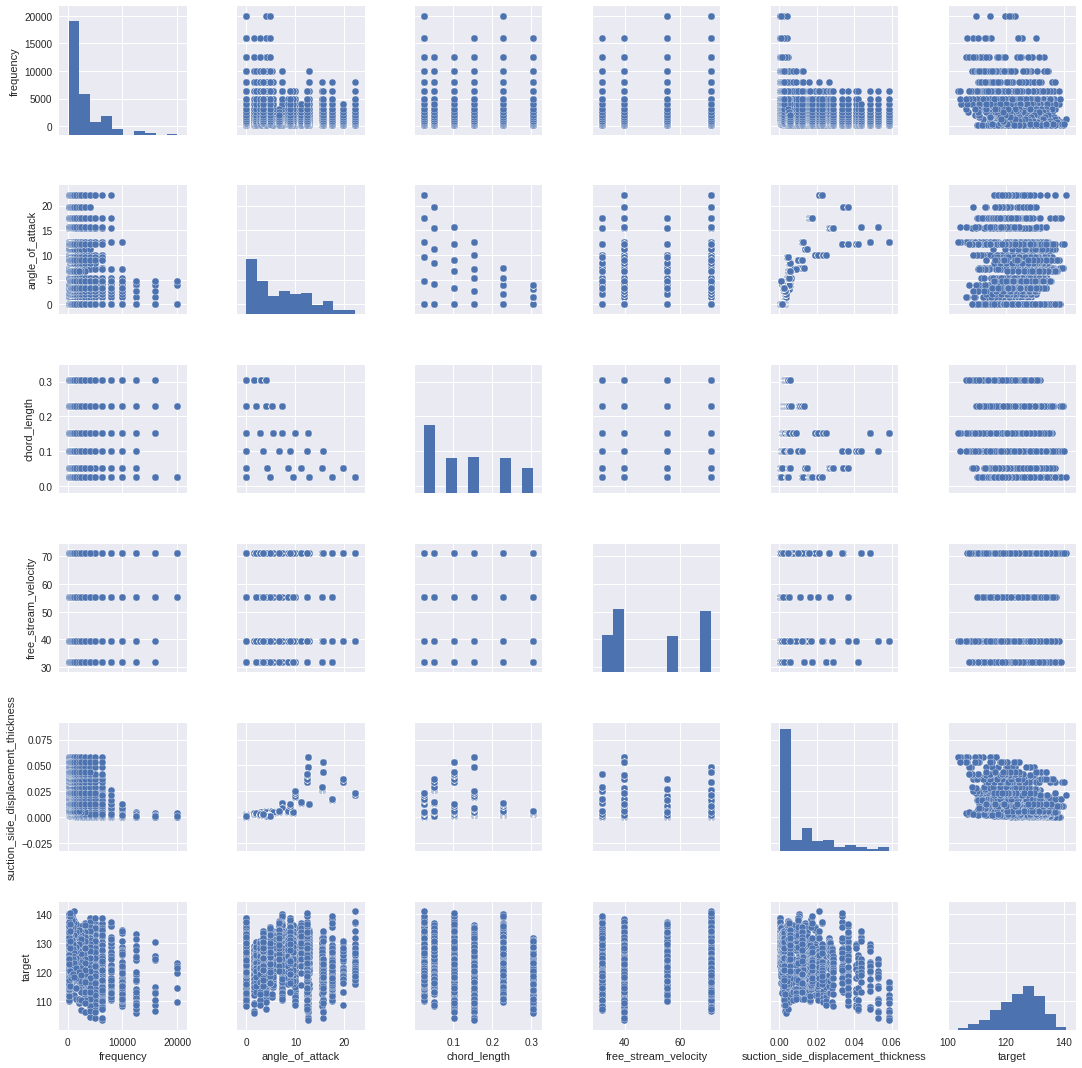

In [6]:
airfoil_plot = airfoil_dataset.copy()
sns.pairplot(airfoil_plot)



*   There are only four free stream velocities.
    *   31.7 m/s
    *   39.6 m/s
    *   55.5 m/s
    *   71.3 m/s
    


In [7]:
airfoil_plot["free_stream_velocity"].value_counts()

39.6    480
71.3    465
31.7    281
55.5    277
Name: free_stream_velocity, dtype: int64

*   There are six chord lengths:
    *   2.5 cm
    *   5 cm
    *   10 cm
    *   15 cm
    *   22 cm
    *   30 cm


In [8]:
airfoil_plot["chord_length"].value_counts()

0.0254    278
0.1524    271
0.2286    266
0.1016    263
0.0508    237
0.3048    188
Name: chord_length, dtype: int64

## Prepare the data

Split the test and train data

In [0]:

train_data = airfoil_dataset.copy()
train_set = train_data.drop("target", axis = 1)
train_labels = train_data["target"].copy()

X_train, X_test, y_train, y_test = train_test_split(train_set, train_labels, test_size=0.2)

## Train the data

In [0]:

class ModelEstimator():
    def __init__(self, models, parameters):
        """
        
        """
        self.models = models
        self.parameters = parameters

    def fit(self, X_train, X_test, y_train, y_test, cv=3, scoring=None, refit=True):
        
        for key, model in self.models.items():
            print('Fitting model {0}'.format(key))
            
            current_parameter = self.parameters.get(key, {})
            
            gs = GridSearchCV(model, 
                              current_parameter,
                              cv=cv, 
                              scoring=scoring, 
                              refit=refit,
                              return_train_score=True)

            gs.fit(X_train, y_train)

            
            print(gs.best_score_)

In [13]:
models_to_train = {
        'LinearRegression': LinearRegression(),
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        'ElasticNet': ElasticNet()

    }

parameters_to_train = {
    'LinearRegression': {'fit_intercept': [True, False], 
                         'normalize': [True, False]
                        },
    
    'Ridge': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso': {'alpha': [0.1, 1.0, 10.0]},
    'ElasticNet': {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0, 0.1, 0.5, 1, 10, 100]}
    
    
}

train_estimator = ModelEstimator(models_to_train, parameters_to_train)

train_estimator.fit(X_train, X_test, y_train, y_test, cv=5, scoring='r2')

print('-------------')

train_estimator.fit(X_train, X_test, y_train, y_test, cv=5, scoring='neg_mean_squared_error')


Fitting model LinearRegression
0.5135164796919574
Fitting model Ridge
0.504661907022243
Fitting model Lasso
0.4559739962752851
Fitting model ElasticNet
0.4559739962752851
-------------
Fitting model LinearRegression
-23.43829166694888
Fitting model Ridge
-23.87380757908636
Fitting model Lasso
-26.226039534347375
Fitting model ElasticNet
-26.226039534347375


## Predict the data

## Results